In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as po
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.pyplot as px
import plotly.express as px
import random
import plotly.figure_factory as ff

In [1]:
df1 = pd.read_csv("data/accidents/accidents_2005_to_2007.csv")
df2 = pd.read_csv("data/accidents/accidents_2009_to_2011.csv")
df3 = pd.read_csv("data/accidents/accidents_2012_to_2014.csv")

NameError: name 'pd' is not defined

In [3]:
datas = pd.concat([df1,df2,df3])

In [4]:
datas

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464692,2.01E+12,310037.0,597647.0,-3.417278,55.264773,98,2,2,1,07/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,None,None,2,Yes,NaN,2014
464693,2.01E+12,321509.0,574063.0,-3.230255,55.054855,98,3,2,2,11/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,None,None,2,Yes,NaN,2014
464694,2.01E+12,321337.0,566365.0,-3.230826,54.985668,98,3,1,1,09/12/2014,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,None,None,2,Yes,NaN,2014
464695,2.01E+12,323869.0,566853.0,-3.191397,54.990446,98,2,3,2,17/12/2014,...,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,None,None,2,Yes,NaN,2014


In [5]:
datas.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

In [6]:
datas.shape

(1504150, 33)

In [7]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1504150 entries, 0 to 464696
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1504150 non-null  object 
 1   Location_Easting_OSGR                        1504049 non-null  float64
 2   Location_Northing_OSGR                       1504049 non-null  float64
 3   Longitude                                    1504049 non-null  float64
 4   Latitude                                     1504049 non-null  float64
 5   Police_Force                                 1504150 non-null  int64  
 6   Accident_Severity                            1504150 non-null  int64  
 7   Number_of_Vehicles                           1504150 non-null  int64  
 8   Number_of_Casualties                         1504150 non-null  int64  
 9   Date                                         15

In [8]:
data = datas.drop(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR','Longitude',
       'Latitude', 'Police_Force','Date','Local_Authority_(District)','Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Speed_limit','Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 
       'Special_Conditions_at_Site', 'Carriageway_Hazards','Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'], axis=1)

In [9]:
data.head(10)


,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Time,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Year
0,2,1,1,3,17:42,Single carriageway,Daylight: Street light present,Raining without high winds,Wet/Damp,1,2005
1,3,1,1,4,17:36,Dual carriageway,Darkness: Street lights present and lit,Fine without high winds,Dry,1,2005
2,3,2,1,5,00:15,Single carriageway,Darkness: Street lights present and lit,Fine without high winds,Dry,1,2005
3,3,1,1,6,10:35,Single carriageway,Daylight: Street light present,Fine without high winds,Dry,1,2005
4,3,1,1,2,21:13,Single carriageway,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,1,2005
5,3,2,1,3,12:40,Single carriageway,Daylight: Street light present,Raining without high winds,Wet/Damp,1,2005
6,3,2,1,5,20:40,Single carriageway,Darkness: Street lights present and lit,Fine without high winds,Dry,1,2005
7,3,1,2,6,17:35,Dual carriageway,Daylight: Street light present,Fine without high winds,Dry,1,2005
8,3,2,2,7,22:43,Single carriageway,Darkness: Street lights present and lit,Fine without high winds,Dry,1,2005
9,3,2,5,7,16:00,Single carriageway,Daylight: Street light present,Fine without high winds,Dry,1,2005


In [10]:
data.isnull().sum()

Accident_Severity             0
Number_of_Vehicles            0
Number_of_Casualties          0
Day_of_Week                   0
Time                        117
Road_Type                     0
Light_Conditions              0
Weather_Conditions          126
Road_Surface_Conditions    1958
Urban_or_Rural_Area           0
Year                          0
dtype: int64

In [11]:
data.dropna(inplace=True)
data.isnull().sum()

Accident_Severity          0
Number_of_Vehicles         0
Number_of_Casualties       0
Day_of_Week                0
Time                       0
Road_Type                  0
Light_Conditions           0
Weather_Conditions         0
Road_Surface_Conditions    0
Urban_or_Rural_Area        0
Year                       0
dtype: int64

Trafik akışının değişmesi kazaları nasıl etkiler

In [12]:
year = data["Year"].value_counts() 
year

2005    198474
2006    188913
2007    181881
2012    179436
2009    163334
2010    154185
2011    151241
2014    146100
2013    138393
Name: Year, dtype: int64

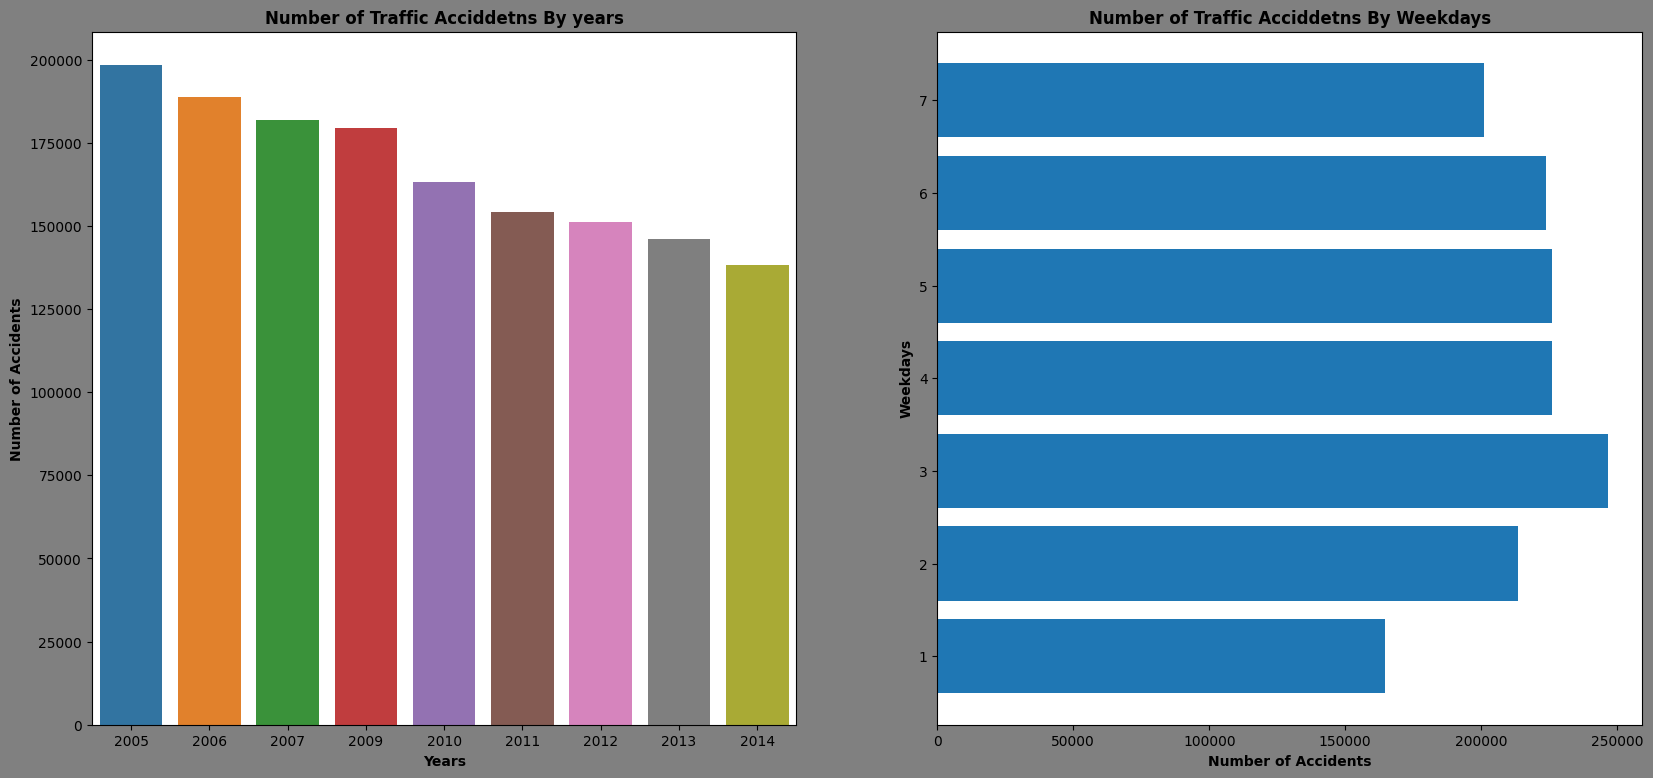

In [13]:
import seaborn as sns
year = data["Year"].value_counts() 

years = data["Year"].unique()
num = year.values

week = data["Day_of_Week"].value_counts()
week
weeks = data["Day_of_Week"].unique()
num_w = week.values

plt.figure(figsize = (20,9),facecolor='grey')

plt.subplot(1, 2, 1)

sns.barplot(x = years, y = num)
plt.ylabel("Number of Accidents",weight="bold")
plt.xlabel("Years",weight="bold")

plt.title("Number of Traffic Acciddetns By years",weight="bold")

plt.subplot(1, 2, 2)

plt.barh(weeks,num_w)
plt.title("Number of Traffic Acciddetns By Weekdays",weight="bold")
plt.xlabel("Number of Accidents",weight="bold")
plt.ylabel("Weekdays",weight="bold")
plt.show()

Kırsal ve kentsel alanlar nasıl farklılaştı?


In [1]:
data["Urban_or_Rural_Area"].value_counts()
plt.style.use("seaborn-darkgrid")

sns.countplot(x="Urban_or_Rural_Area",data=data)
plt.ylabel("Number of Accidents",weight="bold")
plt.xlabel("Urban(1) or Rural(2) Area",weight="bold")
plt.title("Urban Area vs Rural Area",weight="bold")

plt.show() 

NameError: name 'data' is not defined

Zaman içinde kaza oranlarını tahmin edebilir miyiz?

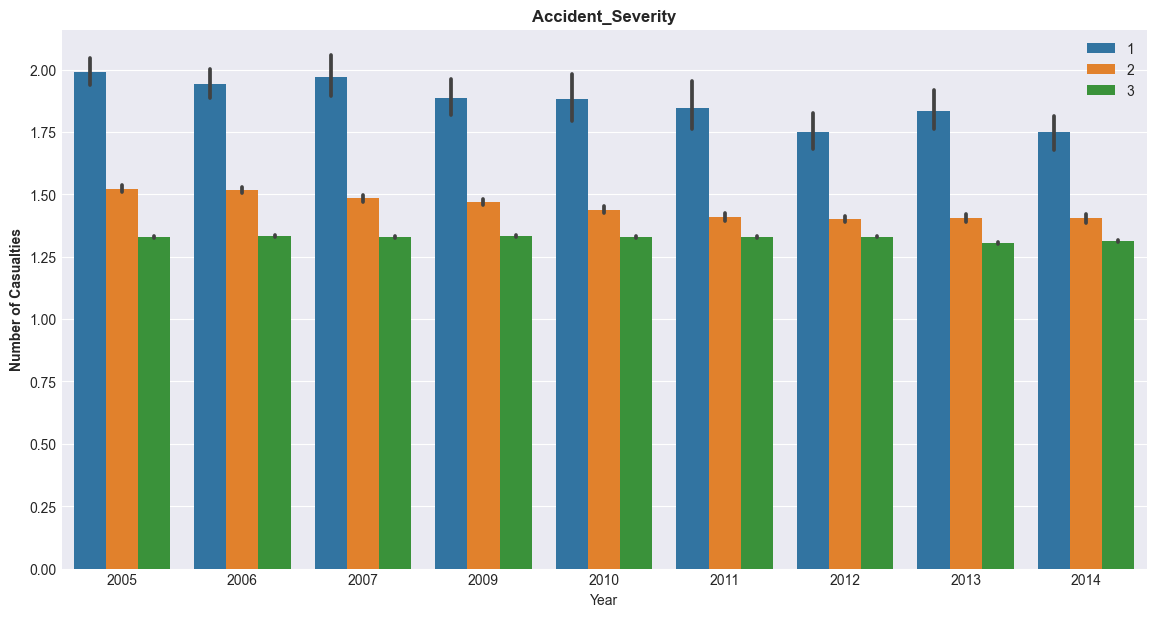

In [17]:
plt.figure(figsize = (14,7))
sns.barplot(x="Year",y="Number_of_Casualties",data=data,hue="Accident_Severity")
plt.title("Accident_Severity",weight="bold")
plt.ylabel("Number of Casualties",weight="bold")
plt.legend(loc="upper right")
plt.show()

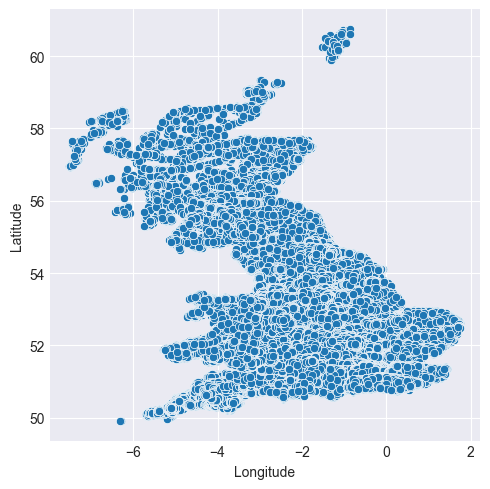

In [18]:
sns.relplot(data=datas,x="Longitude",y="Latitude")